In [24]:
import keras

In [25]:
from keras.datasets import mnist

In [26]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, 

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
batch_size = 128
num_classes = 10
epochs = 5

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
def plot_digit_and_label(image, label):
    print(label)
    plt.imshow(image, cmap='gray')

5


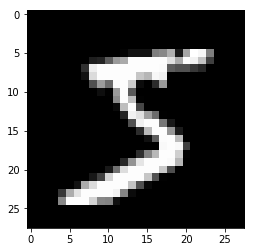

In [32]:
plot_digit_and_label(x_train[0], y_train[0])

In [33]:
def index_to_image_and_label(data_train, data_label, index):
    plot_digit_and_label(data_train[index], data_label[index])

8


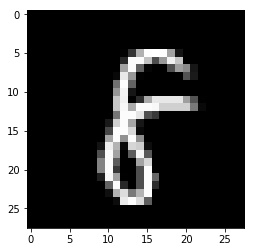

In [34]:
index_to_image_and_label(x_train, y_train, 456)

In [35]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [36]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [37]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [38]:
model = Sequential()

In [39]:
model.add(Dense(4, activation='relu', input_shape=(784,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               2500      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 10,650
Trainable params: 10,650
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [42]:
model.fit(x_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split = .2,
         verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
1s - loss: 1.5862 - acc: 0.4249 - val_loss: 1.1607 - val_acc: 0.5403
Epoch 2/5
1s - loss: 1.2085 - acc: 0.5243 - val_loss: 1.0987 - val_acc: 0.5522
Epoch 3/5
1s - loss: 1.1529 - acc: 0.5349 - val_loss: 1.1084 - val_acc: 0.5512
Epoch 4/5
1s - loss: 1.1241 - acc: 0.5452 - val_loss: 1.0747 - val_acc: 0.5594
Epoch 5/5
1s - loss: 1.1047 - acc: 0.5469 - val_loss: 1.1319 - val_acc: 0.5182


In [43]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [44]:
x_train /= 255
x_test /= 255

In [45]:
y_hat = model.predict_classes(x_test)

 9952/10000 [============================>.] - ETA: 0s

In [46]:
y_hat

array([3, 2, 2, ..., 3, 2, 2])

In [47]:
(_, _),(_, test_labels) = mnist.load_data()

In [48]:
import pandas as pd

In [49]:
pd.crosstab(y_hat, test_labels)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
2,976,1044,999,977,29,870,946,51,935,61
3,4,30,33,33,953,22,11,977,39,946
8,0,61,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,2


In [50]:
test_wrong = [im for im in zip(x_test, y_hat, test_labels) if im[1] != im[2]]
len(test_wrong)

8966

ValueError: num must be 1 <= num <= 256, not 257

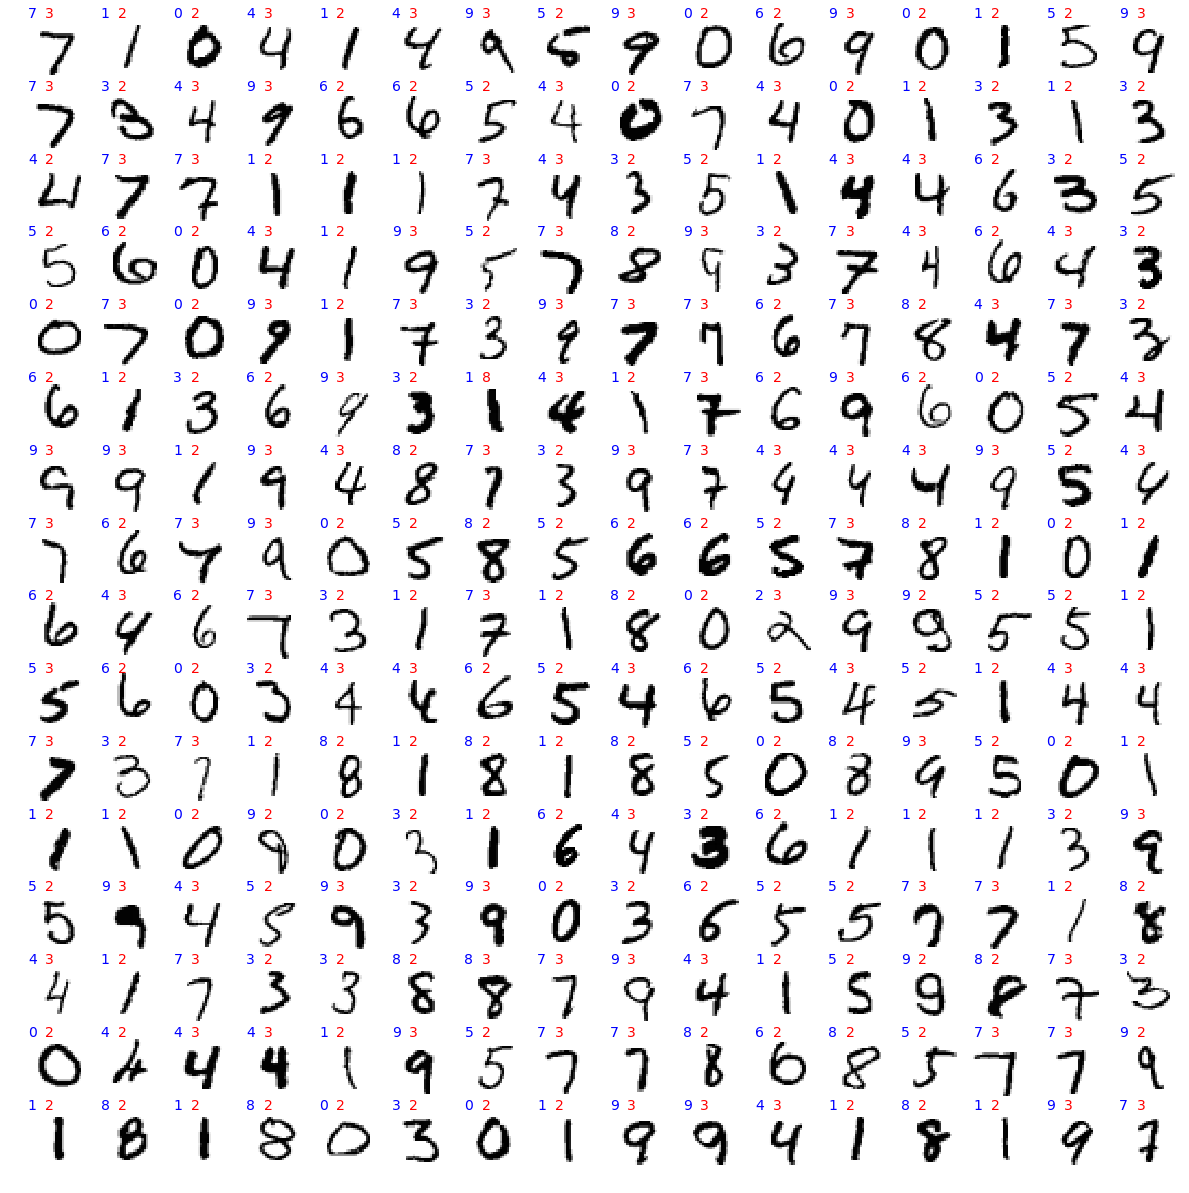

In [51]:
plt.figure(figsize=(16,16))

for index, digit in enumerate(test_wrong):
    plt.subplots_adjust(left=0, right=1, top=1, bottom =0)
    plt.subplot(16,16, index+1)
    plt.imshow(1-digit[0].reshape(28,28), cmap='gray')
    plt.axis('off')
    
    plt.text(0,0, digit[2], fontsize=14, color='blue')
    plt.text(8,0,digit[1], fontsize=14, color='red')
    